In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [302]:
cscp= pd.read_csv('chemicals-in-cosmetics-.csv')
cscp.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [317]:
cscp['BrandName']=cscp['BrandName'].str.lower().str.replace('.','').str.replace(' ','').str.replace('�','')
cscp['ProductName']=cscp['ProductName'].str.lower()
cscp['ChemicalName']=cscp['ChemicalName'].str.lower()

Text(0.5, 1.0, 'Distribution of Number of Chemicals in all Cosmetic Products')

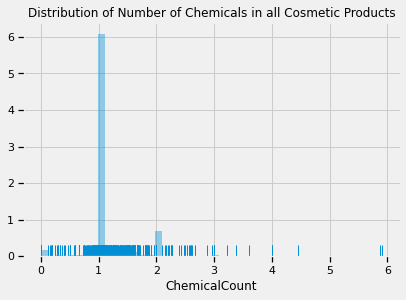

In [318]:
chemical_count = cscp.groupby('BrandName').agg(np.mean)[['ChemicalCount']]
sns.distplot(chemical_count['ChemicalCount'],rug=True)
plt.title('Distribution of Number of Chemicals in all Cosmetic Products')

In [319]:
brand_numproducts=cscp.groupby('BrandName').size().to_frame().rename({0:'Number of Products'},axis=1).reset_index()

In [320]:
brand_numproducts_chemicalcounts = chemical_count.reset_index().merge(brand_numproducts,on='BrandName')
brand_numproducts_chemicalcounts.sort_values('Number of Products',ascending=False).head(5)

,BrandName,ChemicalCount,Number of Products
1813,sephora,1.579671,5165
1515,nyx,1.718624,3227
282,bareminerals,1.033967,3209
1704,revlon,1.004058,2711
486,charlottetilbury,2.394816,2315


In [321]:
import plotly.express as px
fig = px.scatter(y=brand_numproducts_chemicalcounts['Number of Products'], x=brand_numproducts_chemicalcounts['ChemicalCount'],hover_name=brand_numproducts_chemicalcounts['BrandName'])
fig.update_yaxes(title_text='Number of Products')
fig.update_xaxes(title_text='Average Chemical Count')
fig.update_layout(title_text='Average Chemical Count vs. Number of Products for Each Brand')
fig.show()

In [322]:
most_chemical_brands=chemical_count.sort_values('ChemicalCount',ascending=False).query('ChemicalCount>2')
most_chemical_brands.head(5)

,ChemicalCount
BrandName,
mastercuts,5.916667
regisdesignline,5.867347
careline,4.461538
dermaquestskintherapy,4.000000
dermaminerals,4.000000


# Top 5 chemicals used in cosmetic products:
## Titanium dioxide
## Silica, crystalline
## Retinol/Retinyl esters
## Mica
## butylated hydroxyanisole

In [353]:
cscp.groupby('ChemicalName').size().to_frame().rename({0:'count'},axis=1).sort_values('count',ascending=False).head(5)

,count
ChemicalName,
titanium dioxide,93252
"silica, crystalline (airborne particles of respirable size)",2742
"retinol/retinyl esters, when in daily dosages in excess of 10,000 iu, or 3,000 retinol equivalents.",2154
mica,1911
butylated hydroxyanisole,1888


## Top 5 brands with the most average chemical count: Mastercuts, Regis Design Line, Careline, Palladio, Dermaminerals

In [323]:
print('There are '+str(len(chemical_count.query('ChemicalCount==0')))+' brands that have no chemicals in their products.')

There are 50 brands that have no chemicals in their products.


# 13 unique categories of cosmetic products in this dataset

In [324]:
cscp['PrimaryCategory'].unique()

array(['Makeup Products (non-permanent)',
       'Hair Care Products (non-coloring)', 'Nail Products',
       'Personal Care Products', 'Sun-Related Products', 'Bath Products',
       'Skin Care Products ', 'Fragrances',
       'Tattoos and Permanent Makeup', 'Hair Coloring Products',
       'Oral Hygiene Products', 'Shaving Products', 'Baby Products'],
      dtype=object)

# Goal: Explore cosmetic products in each of these categories to recommend products with the highest and lowest chemical count respectively

In [325]:
categories=cscp['PrimaryCategory'].unique()

In [326]:
def brand_finder(category):
    df=cscp[cscp['PrimaryCategory']==category].groupby('BrandName').agg(np.mean).sort_values('ChemicalCount').reset_index()
    least=str(np.array(df.head(3)['BrandName']))[1:-1]
    most=str(np.array(df.tail(3)['BrandName']))[1:-1]
    text1 = "\033[32m"
    text2 = "\033[31m"
    print("\033[1m",text1,'The three most chemical-safe brands in '+category+' are '+least)
    print("\033[1m",text2,'The three least chemical-safe brands in '+category+' are '+most)

# Makeup Products (non-permanent)

In [327]:
brand_finder(categories[0])

  The three most chemical-safe brands in Makeup Products (non-permanent) are "tom'sofmaine" 'hallmarkcards,inc' 'oi-lin'
  The three least chemical-safe brands in Makeup Products (non-permanent) are 'bongo' 'toofacedcosemtics' 'candies'


# Hair Care Products (non-coloring)

In [328]:
brand_finder(categories[1])

  The three most chemical-safe brands in Hair Care Products (non-coloring) are 'lalooks' 'moltonbrown' 'inseta'
  The three least chemical-safe brands in Hair Care Products (non-coloring) are 'costcutters' 'regisdesignline' 'mastercuts'


# Nail Products

In [329]:
brand_finder(categories[2])

  The three most chemical-safe brands in Nail Products are 'topps' 'cacee' 'nailene'
  The three least chemical-safe brands in Nail Products are 'seibella-confidential' 'palladio' 'chromehearts'


# Personal Care Products

In [330]:
brand_finder(categories[3])

  The three most chemical-safe brands in Personal Care Products are 'foaminghandsoap' 'sisley-paris' 'fds'
  The three least chemical-safe brands in Personal Care Products are 'carex' 'houbigant' 'handi-fresh'


# Sun-Related Products

In [331]:
brand_finder(categories[4])

  The three most chemical-safe brands in Sun-Related Products are 'serumvegetal' 'oi-lin' 'niveamen'
  The three least chemical-safe brands in Sun-Related Products are 'dermaminerals' 'strivectin' 'bliss'


# Bath Products

In [332]:
brand_finder(categories[5])

  The three most chemical-safe brands in Bath Products are 'bubblebath' 'reliable' 'bathcrayons'
  The three least chemical-safe brands in Bath Products are 'lumorolk5019' 'luxurylushpud' 'houbigant'


# Skin Care Products

In [333]:
brand_finder(categories[6])

  The three most chemical-safe brands in Skin Care Products  are 'kandesnspa' 'sbs40' 'esterelbeauteavancee'
  The three least chemical-safe brands in Skin Care Products  are 'perfectlypure' 'dermaquestskintherapy' 'careline'


# Fragrances

In [335]:
brand_finder(categories[7])

  The three most chemical-safe brands in Fragrances are 'sisley-paris' 'aflredsung' 'sergelutens'
  The three least chemical-safe brands in Fragrances are 'hannahmontana' 'matchrace' 'houbigant'


# Tattoos and Permanent Makeup

In [336]:
brand_finder(categories[8])

  The three most chemical-safe brands in Tattoos and Permanent Makeup are 'hallmarkcards,inc' 'dayspringinc' 'doublemax'
  The three least chemical-safe brands in Tattoos and Permanent Makeup are 'aqua-hazelnut' 'aqua-mediumbrownareola' 'aqua-mochachino'


# Hair Coloring Products

In [337]:
brand_finder(categories[9])

  The three most chemical-safe brands in Hair Coloring Products are 'kandesn' 'instacolor' "zach'swax"
  The three least chemical-safe brands in Hair Coloring Products are 'compagniadelcolore' 'coveryourgray' 'coveryourgray/coverthatgray'


# Oral Hygience Products

In [338]:
brand_finder(categories[10])

  The three most chemical-safe brands in Oral Hygiene Products are 'sunsmile' "tom'sofmaine" 'colgate'
  The three least chemical-safe brands in Oral Hygiene Products are 'lush' 'lushmanufacturingltd' 'lushltd'


# Shaving Products

In [339]:
brand_finder(categories[11])

  The three most chemical-safe brands in Shaving Products are 'inseta' 'halston' 'esterelbeauteavancee'
  The three least chemical-safe brands in Shaving Products are 'eosevolutionofsmooth' 'rituals' 'houbigant'


# Baby Products

In [340]:
brand_finder(categories[12])

  The three most chemical-safe brands in Baby Products are 'biosilk' 'mustela' 'thebodyshop'
  The three least chemical-safe brands in Baby Products are 'avalonorganics' 'herbalskinsolutions' 'harmonfacevalues'


# Finding out which brands have trade secrets!
## What are trade secrets?
### Trade secrets are ingredients that cosmetic brands to not disclose because they are suspected to cancer, birth defects, or other developmental or reproductive harm. However, giving any company the benefit of the doubt means that they can also use trade secrets to report unique formulas that their products use. Therefore, companies that have trade secret chemicals but have an overall chemical count of 0 are less concerning to me than those with trade secret chemicals having an overall chemical count of 1 or more!

In [214]:
print('There are '+str(len(cscp[cscp['ChemicalName']=='trade secret']))+' products that contain trade secret chemicals!')

There are 668 products that contain trade secret chemicals!


In [215]:
trade_secrets=cscp[cscp['ChemicalName']=='trade secret'].query('ChemicalCount>0')
len(trade_secrets)

655

### We were only able to remove 13 products from our trade secret list by filtering out the products that have a chemical count of zero.

In [216]:
trade_secrets.sort_values('ChemicalCount',ascending=False).head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
15726,3702,interrupt texturizing clay,NaN,NaN,165,Regis Corporation,regis design line,18,Hair Care Products (non-coloring),26,...,0,0,trade secret,10/12/2009,02/04/2014,NaN,10/12/2009,02/04/2014,02/04/2014,8
15769,3714,intensity conditioning therapy,NaN,NaN,165,Regis Corporation,regis design line,18,Hair Care Products (non-coloring),21,...,0,0,trade secret,10/12/2009,02/04/2014,NaN,10/12/2009,02/04/2014,02/04/2014,7
19051,4584,chi curl preserve system leave-in conditioner,NaN,NaN,120,"Farouk Systems, Inc.",chi,18,Hair Care Products (non-coloring),20,...,0,0,trade secret,10/14/2009,04/26/2016,NaN,10/14/2009,10/14/2009,NaN,2
19100,4621,chi ionic color protector system sulfate-free ...,NaN,NaN,120,"Farouk Systems, Inc.",chi,18,Hair Care Products (non-coloring),25,...,0,0,trade secret,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,1
19070,4597,silk therapy bubble bath,NaN,NaN,120,"Farouk Systems, Inc.",biosilk,6,Bath Products,9,...,0,0,trade secret,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,1


### Two products have an alarming number of chemicals: Interrupt Texturizing Clay and Intensity Conditioning Therapy, both by Regis Design Line! 

In [217]:
trade_secrets.groupby('PrimaryCategory').size()

PrimaryCategory
Bath Products                         18
Fragrances                            20
Hair Care Products (non-coloring)    127
Hair Coloring Products               389
Makeup Products (non-permanent)       49
Nail Products                          1
Skin Care Products                    42
Sun-Related Products                   9
dtype: int64

### Hair Care and Hair Coloring Products have the most trade secrets! We need to be especially careful about what we buy in these 2 cosmetic categories!

In [218]:
trade_secrets_by_category=trade_secrets.groupby('PrimaryCategory')['BrandName'].unique().to_frame()
trade_secrets_by_category

,BrandName
PrimaryCategory,
Bath Products,"[biosilk, chi, coast]"
Fragrances,[demeter]
Hair Care Products (non-coloring),"[regis design line, sungliltz, sunglitz, chi, ..."
Hair Coloring Products,"[chi, sunglitz, bioglitz, bioglitz color, bios..."
Makeup Products (non-permanent),"[sei bella - confidential, 880620\t, lumene, c..."
Nail Products,[lumene]
Skin Care Products,"[chi, biosilk, lumene, jan marini skin research]"
Sun-Related Products,"[lumene, sea enzyme 4552-815 ultra umbrella]"


# Avoid these brand names for the following cosmetic categories:


## Bath Products: BioSilk, CHI, Coast

## Fragrances: Demeter

## Hair Care Products (non-coloring): Regis Design Line, Sungliltz, Sunglitz, CHI, CHI Organics, BioSilk, Detour - Great Clips, Solutions by Great Clips, INSIGHT, ORGANIC WAY, UNA, Jan Marini Skin Research, Nexxus, SOMÈRFIELD, Nature's Gate, Solimo

## Hair Coloring Products: CHI, Sunglitz, Bioglitz, Bioglitz Color, BioSilk, Chromatic, ORGANIC WAY, INSIGHT

## Makeup Products (non-permanent): Sei Bella - Confidential, Lumene, Color secret, Color Secret, esselavenna, pur-lisse, SB, YL, YB, MEISHOKU

## Nail Products: Lumene

## Skin Care Products: CHI, BioSilk, Lumene, Jan Marini Skin Research

## Sun-Related Products: Lumene, Sea Enzyme 4552-815 Ultra Umbrella

In [219]:
trade_secrets.groupby('BrandName').count().sort_values('CDPHId',ascending=False).reset_index().head(3)['BrandName']

0         chi
1    bioglitz
2      lumene
Name: BrandName, dtype: object

# Top 3 Brand Names with the most trade secret products: 
# CHI, Bioglitz, Lumene